In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
import numpy as np

class OrdinaryLeastSquares:
    def __init__(self, order=1):
        self.order = int(order)
        self.coefficients = None

    def fit(self, X, y):
        """
        Fits the OLS model to the data.
        X : array-like, shape (n_samples,)
            The input data.
        y : array-like, shape (n_samples,)
            The target values.
        """
        X = np.asarray(X)
        y = np.asarray(y)

        if self.order < 0:
            X_aug = np.vstack([X**(-i) for i in range(abs(self.order) + 1)]).T
        else:
            X_aug = np.vstack([X**i for i in range(self.order + 1)]).T
        
        # OLS estimation using the normal equation
        self.coefficients = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y

    def predict(self, X):
        """
        Predicts target values using the fitted model.
        X : array-like, shape (n_samples,)
            The input data.
        """
        if self.coefficients is None:
            raise ValueError("Model is not fitted yet. Call 'fit' with training data.")
            
        X = np.asarray(X)
        if self.order < 0:
            X_aug = np.vstack([X**(-i) for i in range(abs(self.order) + 1)]).T
        else:
            X_aug = np.vstack([X**i for i in range(self.order + 1)]).T
        
        return X_aug @ self.coefficients

    def coefficients(self):
        """Returns the fitted coefficients."""
        if self.coefficients is None:
            raise ValueError("Model is not fitted yet. Call 'fit' with training data.")
        return self.coefficients
    
    def plot_function(self, ax, function, xs, **kwargs):
        """
        Plots the function on the given axis.
        ax : matplotlib axis
            The axis to plot the function on.
        function : callable
            The function to plot.
        xs : array-like
            The x values to evaluate the function at.
        **kwargs
            Additional keyword arguments to pass to the plot function.
        """
        ax.plot(xs, function(xs), **kwargs)
    
    def plot_data(self, ax, xs, ys, **kwargs):
        """
        Plots the data on the given axis.
        ax : matplotlib axis
            The axis to plot the data on.
        xs : array-like
            The x values of the data.
        ys : array-like
            The y values of the data.
        **kwargs
            Additional keyword arguments to pass to the plot function.
        """
        ax.scatter(xs, ys, **kwargs)
    
    def plot_predictions(self, ax, xs, **kwargs):
        """
        Plots the predictions on the given axis.
        ax : matplotlib axis
            The axis to plot the predictions on.
        xs : array-like
            The x values to predict the target values for.
        **kwargs
            Additional keyword arguments to pass to the plot function.
        """
        ax.scatter(xs, self.predict(xs), **kwargs)

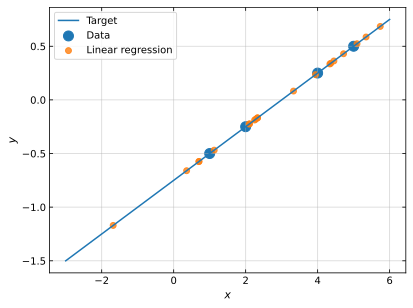

In [3]:
if __name__ == "__main__":
    # Plot linear function (target), data points, and predictions
    lin_func = lambda x: 0.25*x - 0.75
    xs_data = np.array([1, 2, 4, 5])
    ys_data = lin_func(xs_data)
    xs_regr = np.random.uniform(-3, 6, 20)
    xrange = np.linspace(-3, 6, 100)
    ols = OrdinaryLeastSquares(order=1)

    fig, ax = plt.subplots()
    ax.set(xlabel=r'$x$', ylabel=r'$y$')
    ols.plot_function(ax, lin_func, xrange, label="Target")
    ols.plot_data(ax, xs_data, ys_data, s=100, label="Data")
    ols.fit(xs_data, ys_data)
    ols.plot_predictions(ax, xs_regr, alpha=0.8, label="Linear regression")
    ax.legend()
    ax.grid(alpha=0.5)

    fig.savefig('ex29_fig1.png')

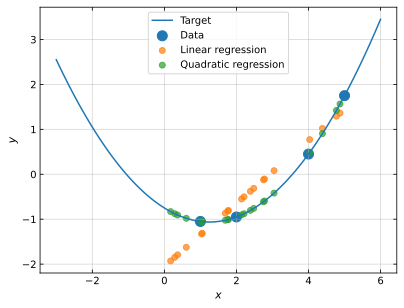

In [4]:
if __name__ == "__main__":
    # Plot quadratic function (target), data points, and predictions from linear regression
    quad_func = lambda x: 0.2*x**2 - 0.5*x - 0.75
    xs_data = np.array([1, 2, 4, 5])
    ys_data = quad_func(xs_data)
    xs_regr = np.random.uniform(0, 5, 20)
    xrange = np.linspace(-3, 6, 100)
    ols = OrdinaryLeastSquares(order=1)

    fig, ax = plt.subplots()
    ax.set(xlabel=r'$x$', ylabel=r'$y$')
    ols.plot_function(ax, quad_func, xrange, label="Target")
    ols.plot_data(ax, xs_data, ys_data, s=100, label="Data")
    ols.fit(xs_data, ys_data)
    ols.plot_predictions(ax, xs_regr, alpha=0.7, label="Linear regression")

    # Now do a quadratic regression and plot on the same axis
    ols.order = 2
    ols.fit(xs_data, ys_data)
    ols.plot_predictions(ax, xs_regr, alpha=0.7, label="Quadratic regression")
    ax.legend()
    ax.grid(alpha=0.5)

    fig.savefig('ex29_fig2.png')